In [9]:
import numpy as np
from qs_mps.utils import load_list_of_lists, tensor_shapes, create_sequential_colors
from qs_mps.mps_class import MPS
import matplotlib.pyplot as plt
import matplotlib as mpl
%load_ext autoreload
%autoreload 2

# default parameters of the plot layout
plt.rcParams["text.usetex"] = True  # use latex
plt.rcParams["font.size"] = 13
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.constrained_layout.use"] = True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Fluxtube of the electric field

In [10]:
# initialize parameters
model = "Z2_dual"

path = "marcos"
charges_x = [1,9]
charges_y = [3,3]
L_string = charges_x[1] - charges_x[0]
precision = 3
h_i = 0.01
h_f = 1.0
npoints = 101
interval = np.linspace(h_i,h_f,npoints)
L = 11
l = 6
chi = 64
endens, correl = True, True

if model == "Ising":
    model_path = "0_ISING"

elif model == "Z2_dual":
    model_path = "1_Z2"
    param_label = "h"
    if charges_x == None:
        sector = "vacuum_sector"
    else:
        sector = f"{len(charges_x)}_particle(s)_sector"

elif model == "ANNNI":
    model_path = "2_ANNNI"

elif model == "Cluster":
    model_path = "3_CLUSTER"
else:
    raise SyntaxError("Model not valid. Choose among 'Ising', 'Z2', 'ANNNI', 'Cluster'")
# take the path and precision to save files
# if we want to save the tensors we save them locally because they occupy a lot of memory
if path == "pc":
    parent_path = f"G:/My Drive/projects/{model_path}"
    path_tensor = f"D:/code/projects/{model_path}"
    path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
elif path == "mac":
    parent_path = f"/Users/fradm98/Google Drive/My Drive/projects/{model_path}"
    path_tensor = f"/Users/fradm98/Desktop/projects/{model_path}"
    path_rdms = "/Users/fradm98/Desktop/fidelity-phase-tran"
elif path == "marcos":
    parent_path = f'/Users/fradm/Google Drive/My Drive/projects/{model_path}'
    path_tensor = f"/Users/fradm/Desktop/projects/{model_path}"

In [4]:
def compute_correlation_function_vacuum():
    corr_vacuum = []
    for h in interval:
        print(f"Correlator - vacuum for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision)
        corr = lattice_mps.connected_correlator(site=L//2, lad=3)
        corr_vacuum.append(corr)
    return corr_vacuum

def compute_electric_energy_density_vacuum():
    eed_vacuum = []
    for h in interval:
        print(f"Energy Density - vacuum for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision)
        eed = lattice_mps.electric_energy_density_Z2(site=L//2-1)
        eed_vacuum.append(eed)
    return eed_vacuum


def compute_correlation_function_charges():
    corr_charges = []
    for h in interval:
        print(f"Correlator - charges for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision, cx=charges_x, cy=charges_y)
        corr = lattice_mps.connected_correlator(site=L//2, lad=3)
        corr_charges.append(corr)
    return corr_charges

def compute_electric_energy_density_charges():
    eed_charges = []
    for h in interval:
        print(f"Energy Density - charges for h: {h}")
        lattice_mps = MPS(L=L,d=2**l, model="Z2_dual", chi=chi, h=h)
        lattice_mps.L = lattice_mps.L - 1
        lattice_mps.load_sites(path=path_tensor, precision=precision, cx=charges_x, cy=charges_y)
        eed = lattice_mps.electric_energy_density_Z2(site=L//2-1)
        eed_charges.append(eed)
    return eed_charges

In [5]:
if endens:
    # compute the connected electric energy density
    eed_charges = compute_electric_energy_density_charges()
    eed_vacuum = compute_electric_energy_density_vacuum()
    eed_conn = (np.array(eed_charges) - np.array(eed_vacuum))

if correl:
    # compute the connected correlation function
    corr_charges = compute_correlation_function_charges()
    corr_vacuum = compute_correlation_function_vacuum()
    corr_conn = (np.array(corr_charges) - np.array(corr_vacuum))


Energy Density - charges for h: 0.01
Energy Density - charges for h: 0.0199
Energy Density - charges for h: 0.0298
Energy Density - charges for h: 0.0397
Energy Density - charges for h: 0.0496
Energy Density - charges for h: 0.0595
Energy Density - charges for h: 0.06939999999999999
Energy Density - charges for h: 0.0793
Energy Density - charges for h: 0.08919999999999999
Energy Density - charges for h: 0.09909999999999998
Energy Density - charges for h: 0.10899999999999999
Energy Density - charges for h: 0.11889999999999999
Energy Density - charges for h: 0.1288
Energy Density - charges for h: 0.1387
Energy Density - charges for h: 0.1486
Energy Density - charges for h: 0.1585
Energy Density - charges for h: 0.1684
Energy Density - charges for h: 0.1783
Energy Density - charges for h: 0.18819999999999998
Energy Density - charges for h: 0.1981
Energy Density - charges for h: 0.208
Energy Density - charges for h: 0.21789999999999998
Energy Density - charges for h: 0.2278
Energy Density 

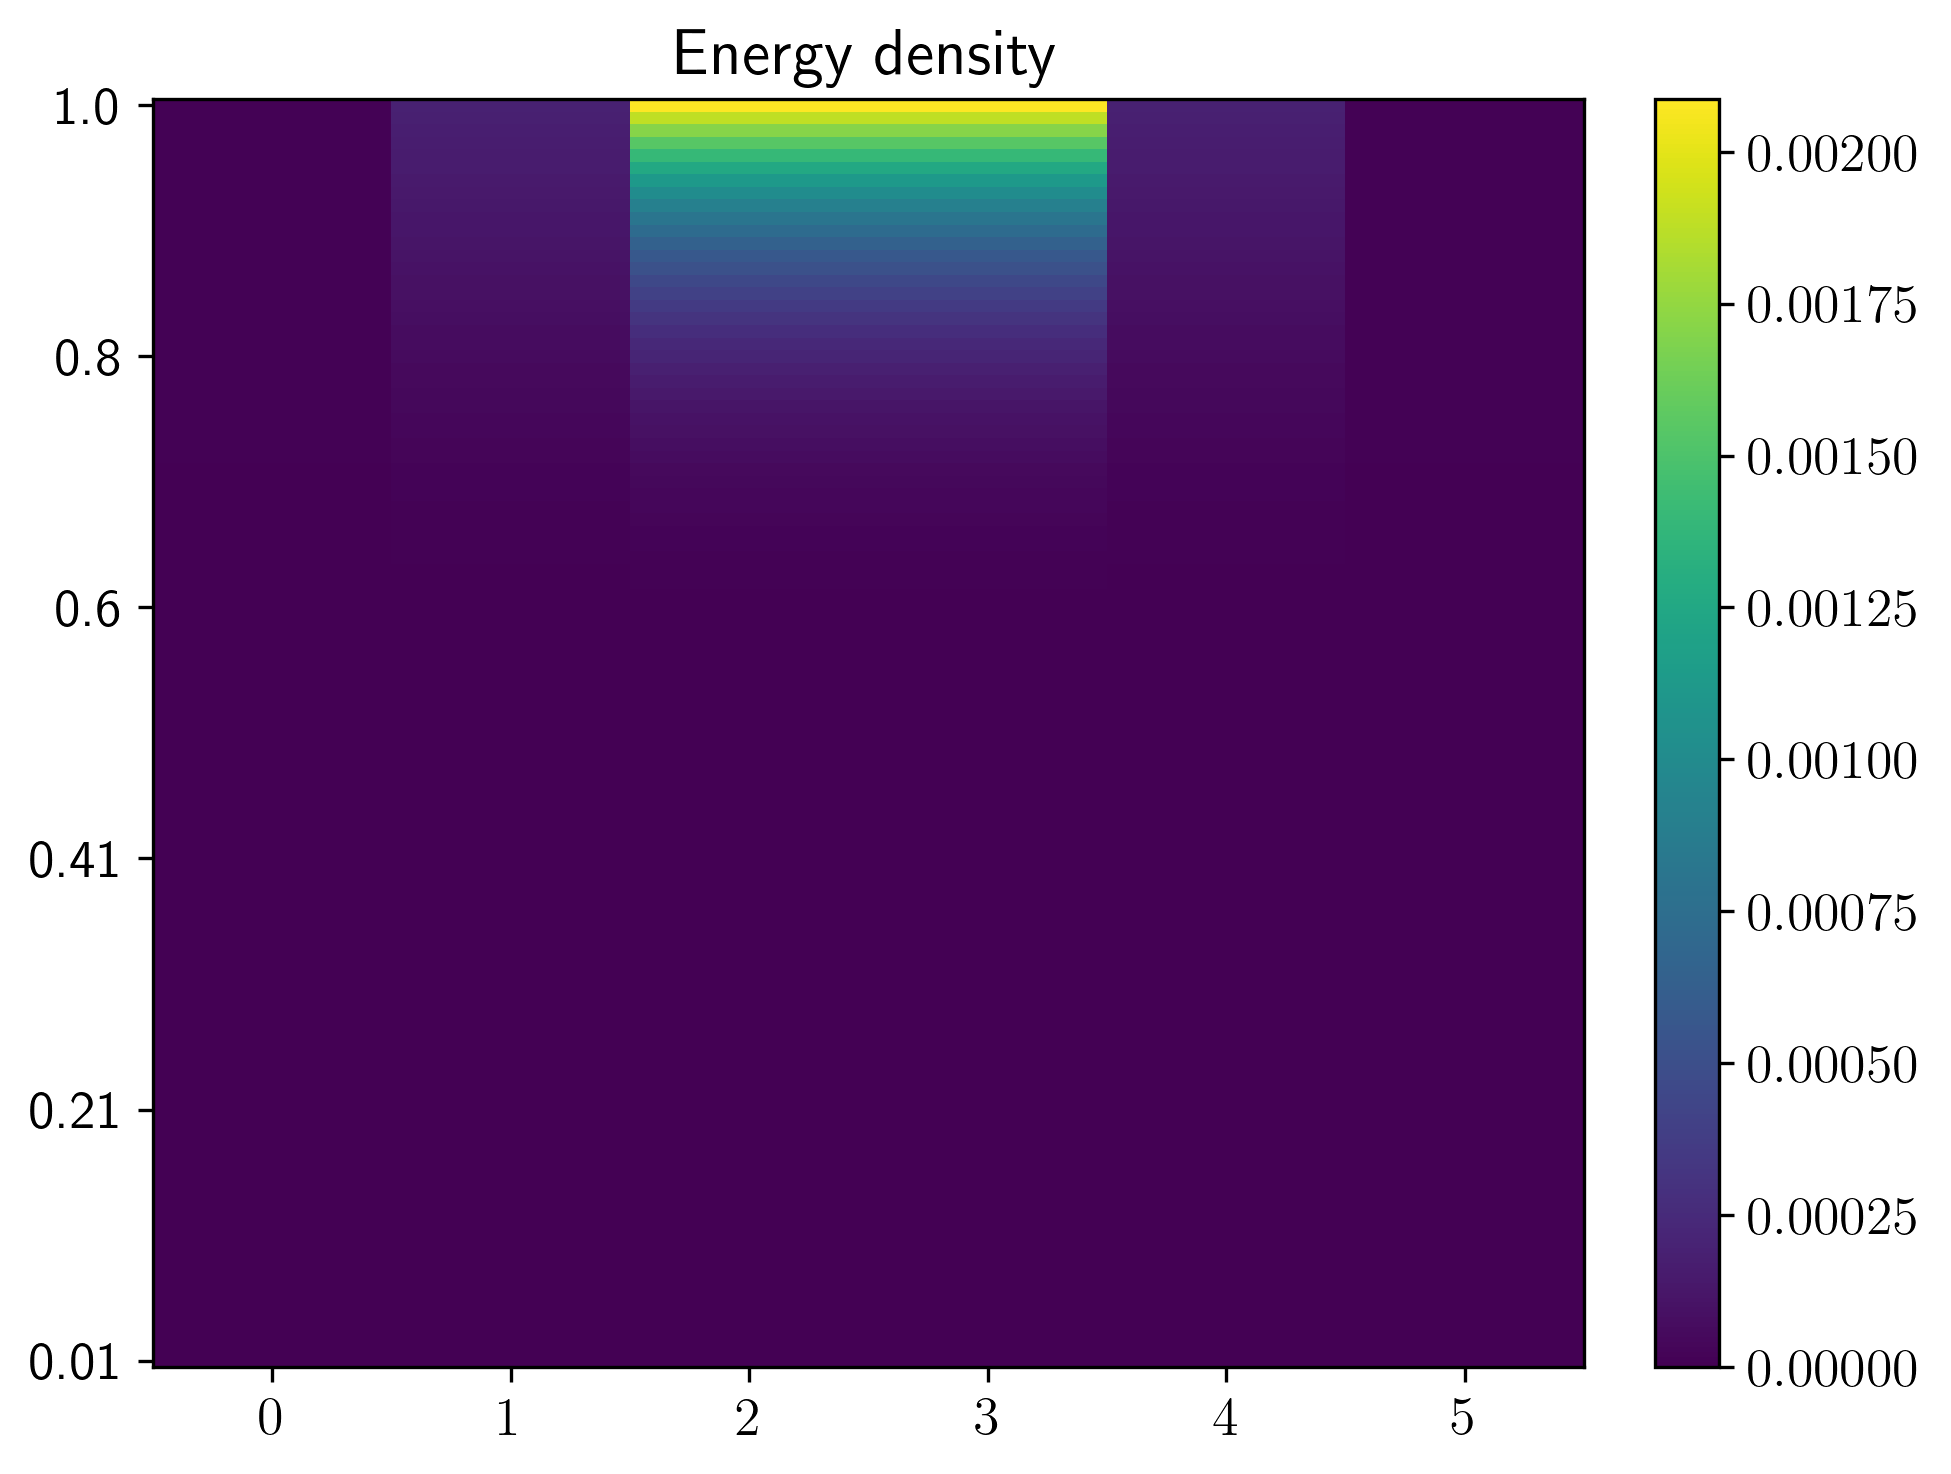

In [6]:
plt.title(f"Energy density")
plt.imshow(eed_conn, aspect='auto', origin='lower') # , norm=mpl.colors.LogNorm()

# plt.title(f"Correlations")
# plt.imshow(corr_conn, aspect=0.1, origin='lower')

plt.yticks(ticks=np.linspace(0,100,101)[::(len(interval)//5)], labels=[round(h,2) for h in interval[::(len(interval)//5)]])
plt.colorbar()
# plt.savefig(f"{parent_path}/figures/correlators/correlator_{model}_direct_lattice_{l}x{L-1}_{sector}_{charges_x}-{charges_y}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chi}.png")

## String width

We find the string width as follows

$$\sigma^2 = \frac{\sum_x x^2 \mathcal{E}(x)}{\sum_x \mathcal{E}(x)}$$

In [7]:
# we find the string width as a normalized sum of the electric energy density for the position squared
eed_string = []
xs = [i for i in range(-l//2,l//2+1,) if i!=0]
for eed_lad in eed_conn:
    eed_sum_lad = 0
    for x, eed_x in zip(xs, eed_lad):
        eed_sum_lad += eed_x * ((x)**2)
    eed_sum_lad = eed_sum_lad / sum(eed_lad)
    eed_string.append(eed_sum_lad)


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/d1/c6hqhfn161x458f4d0m3_rm80000gp/T/ipykernel_2119/3666645651.py:1: SyntaxWarning: invalid escape sequence '\s'
  plt.title("String width $\sigma^2$")


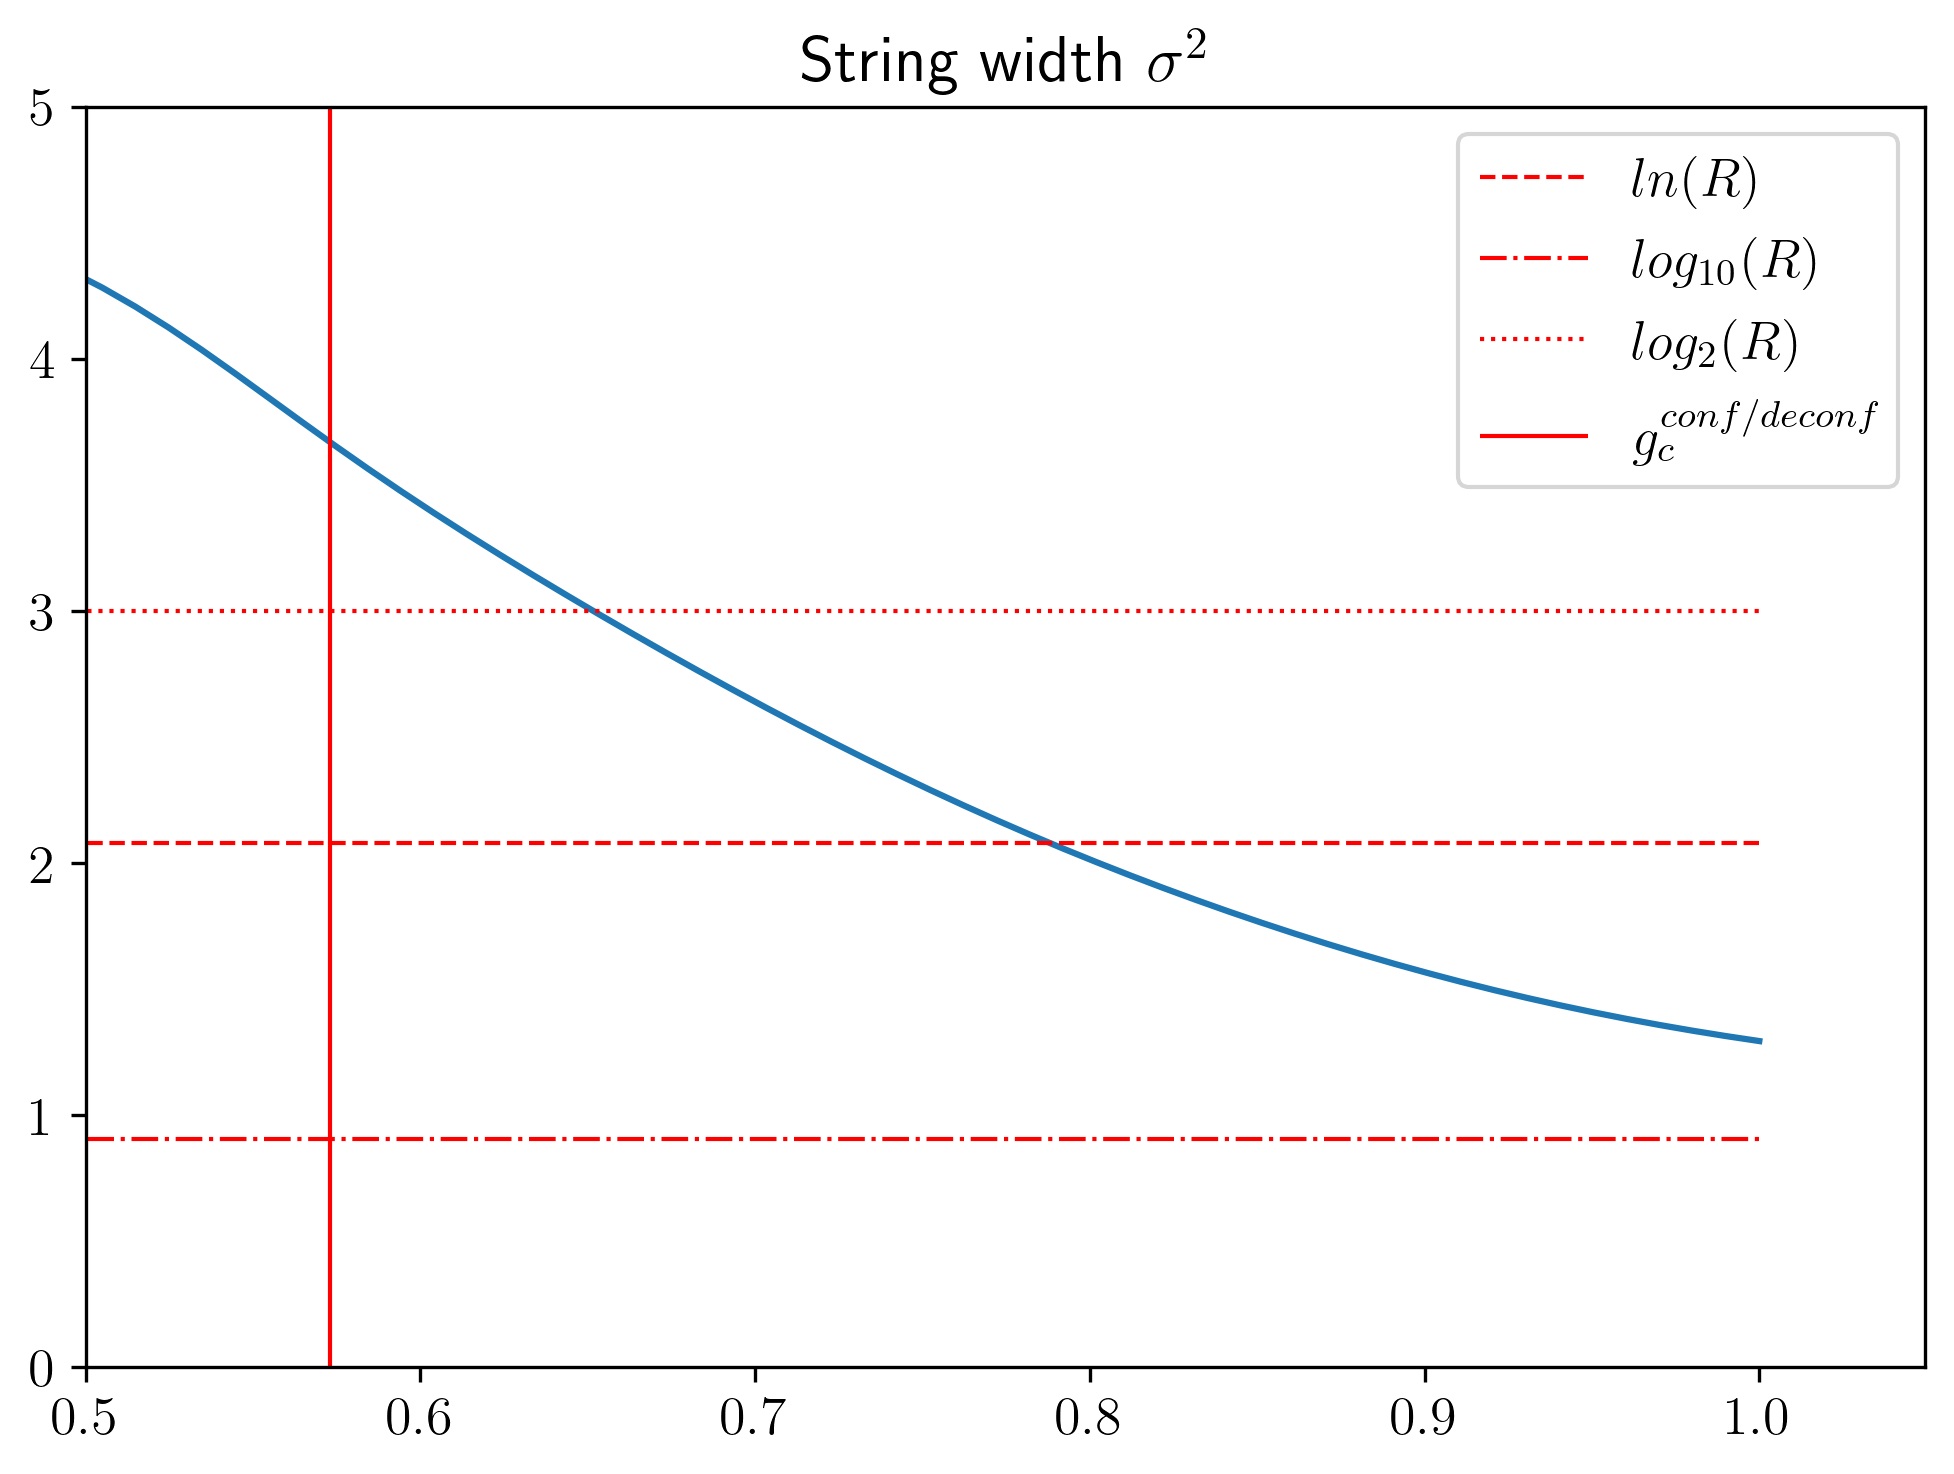

In [42]:
plt.title("String width $\sigma^2$")
plt.plot(interval, eed_string)
d_string_dh = np.gradient(eed_string[50:], interval[50:])
idx_max = np.argmax(np.abs(d_string_dh))
x_val = interval[50:][idx_max]
# plt.plot(interval[50:],np.abs(d_string_dh), label='Derivative')
plt.hlines(y=np.log(L_string), xmin=np.min(interval), xmax=np.max(interval), linestyle='--', linewidth=1, color='r', label='$ln(R)$')
plt.hlines(y=np.log10(L_string), xmin=np.min(interval), xmax=np.max(interval), linestyle='-.', linewidth=1, color='r', label='$log_{10}(R)$')
plt.hlines(y=np.log2(L_string), xmin=np.min(interval), xmax=np.max(interval), linestyle=':', linewidth=1, color='r', label='$log_{2}(R)$')
plt.vlines(x=1/np.sqrt(3.044), ymin=0, ymax=5, linestyle='-', linewidth=1, color='r', label='$g_c^{conf/deconf}$')
plt.legend()
plt.xlim(left=0.5)
plt.ylim((0,5))
plt.savefig(f"{parent_path}/figures/energy_density/string_width_{model}_direct_lattice_{l}x{L-1}_{sector}_{charges_x}-{charges_y}_npoints_{npoints}_h_{h_i}-{h_f}_chi_{chi}.png")
plt.show()


## Decay of Correlators or Energy Density

In [11]:
if endens:
    half_eed = eed_conn[:,:l//2]
if correl:
    half_corr = corr_conn[:,:l//2]

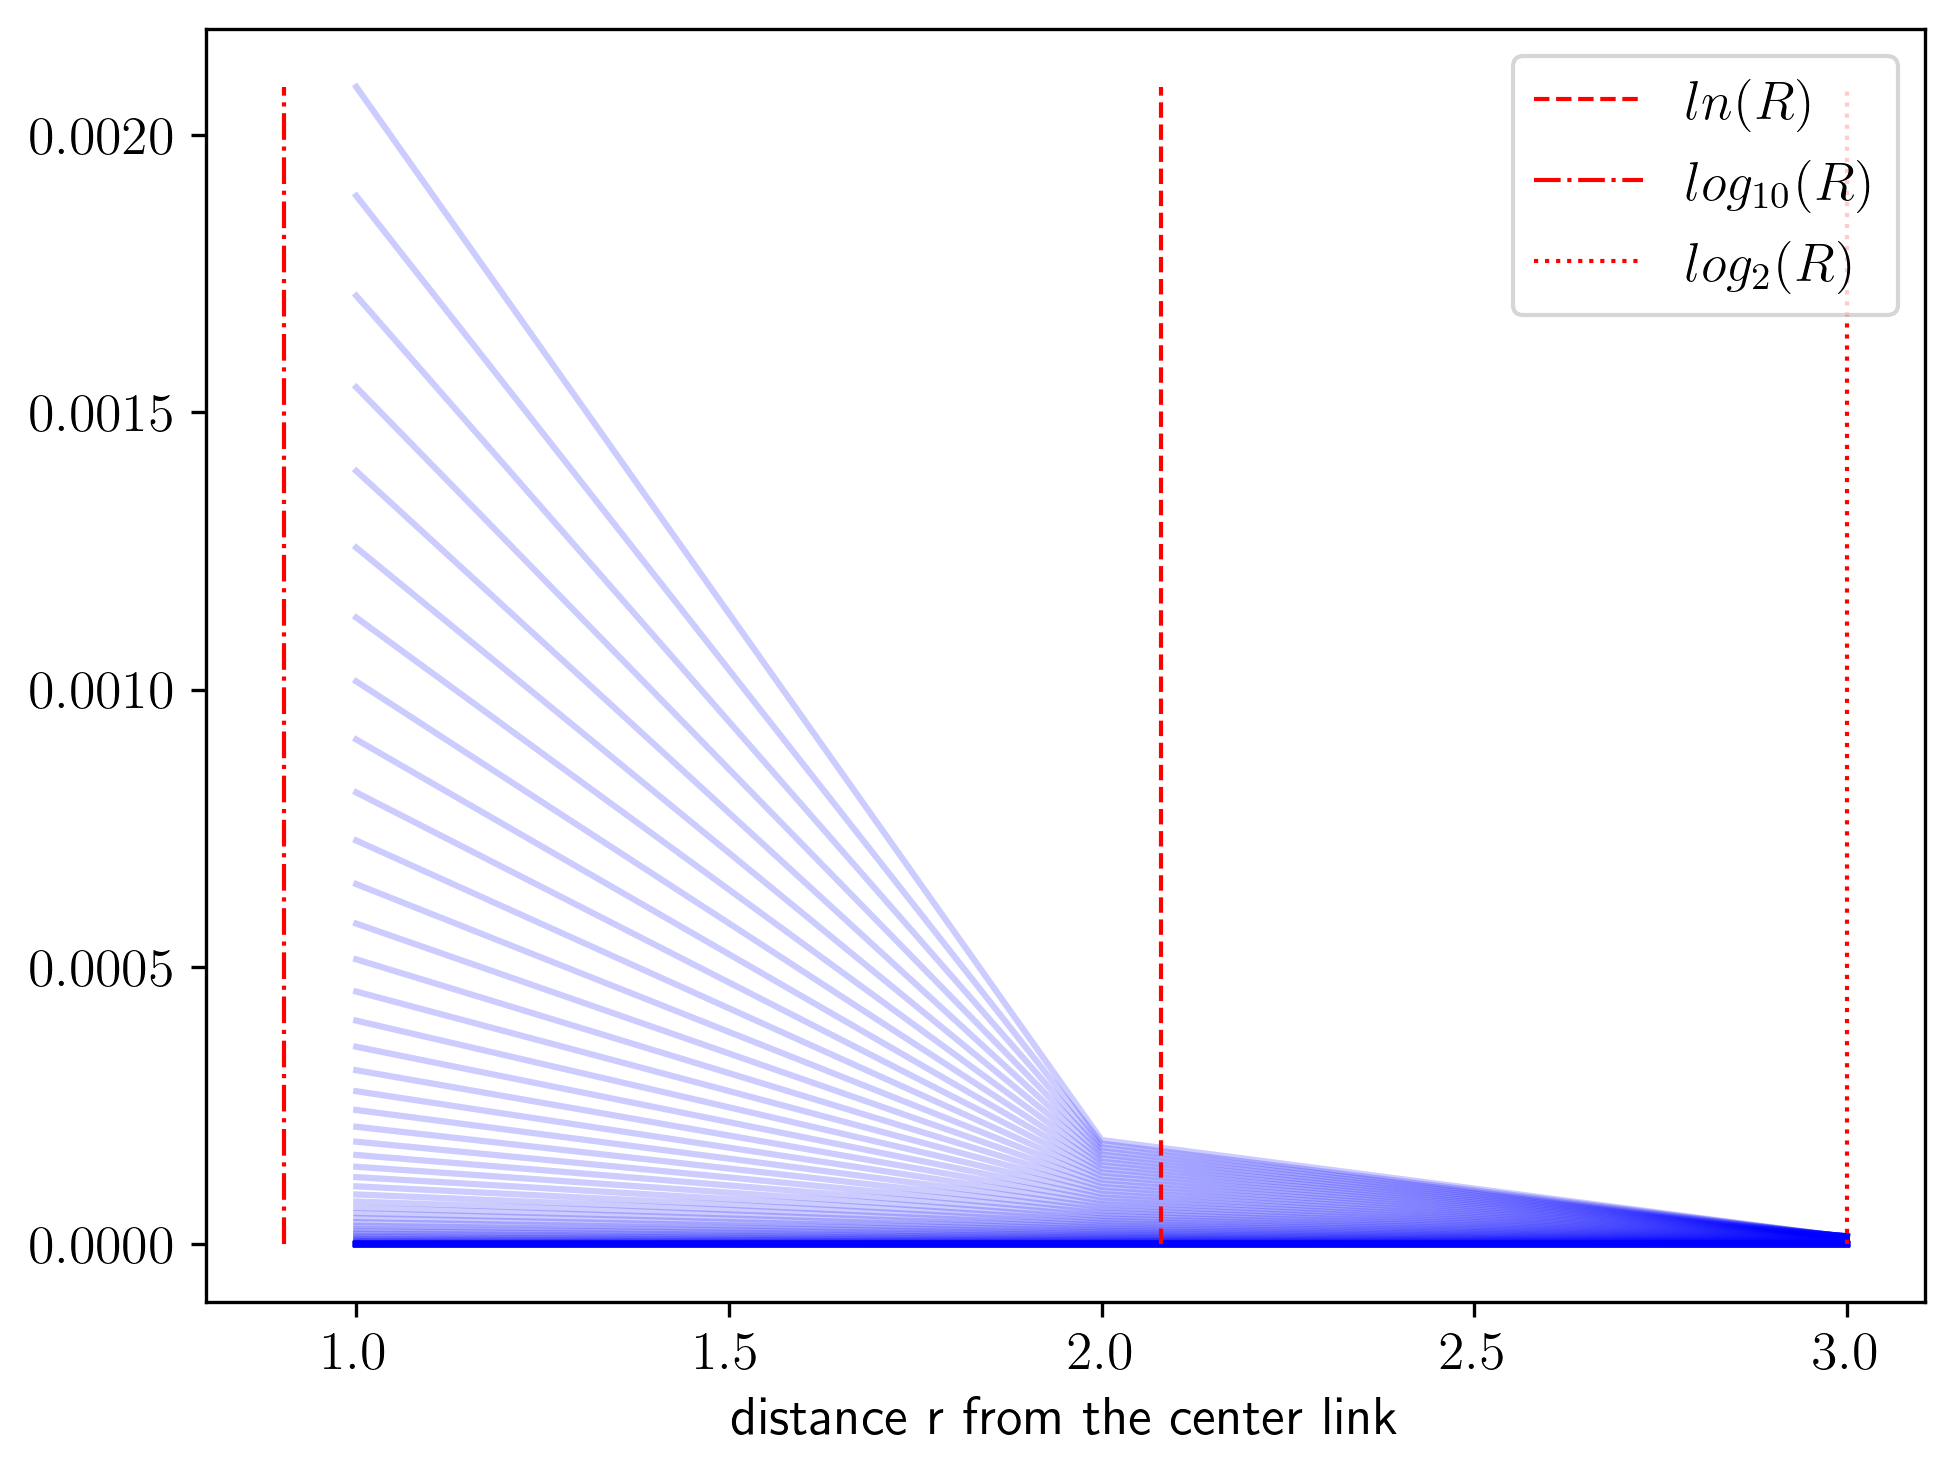

In [26]:
# energy density decay
for half_e in half_eed:
    plt.plot(range(1,l//2+1), half_e[::-1], alpha=0.2, color='blue')
plt.vlines(x=np.log(L_string), ymin=np.min(half_eed), ymax=np.max(half_eed), linestyle='--', linewidth=1, color='r', label='$ln(R)$')
plt.vlines(x=np.log10(L_string), ymin=np.min(half_eed), ymax=np.max(half_eed), linestyle='-.', linewidth=1, color='r', label='$log_{10}(R)$')
plt.vlines(x=np.log2(L_string), ymin=np.min(half_eed), ymax=np.max(half_eed), linestyle=':', linewidth=1, color='r', label='$log_{2}(R)$')
plt.legend()
# plt.yscale('log')
plt.xlabel('distance r from the center link')
plt.show()

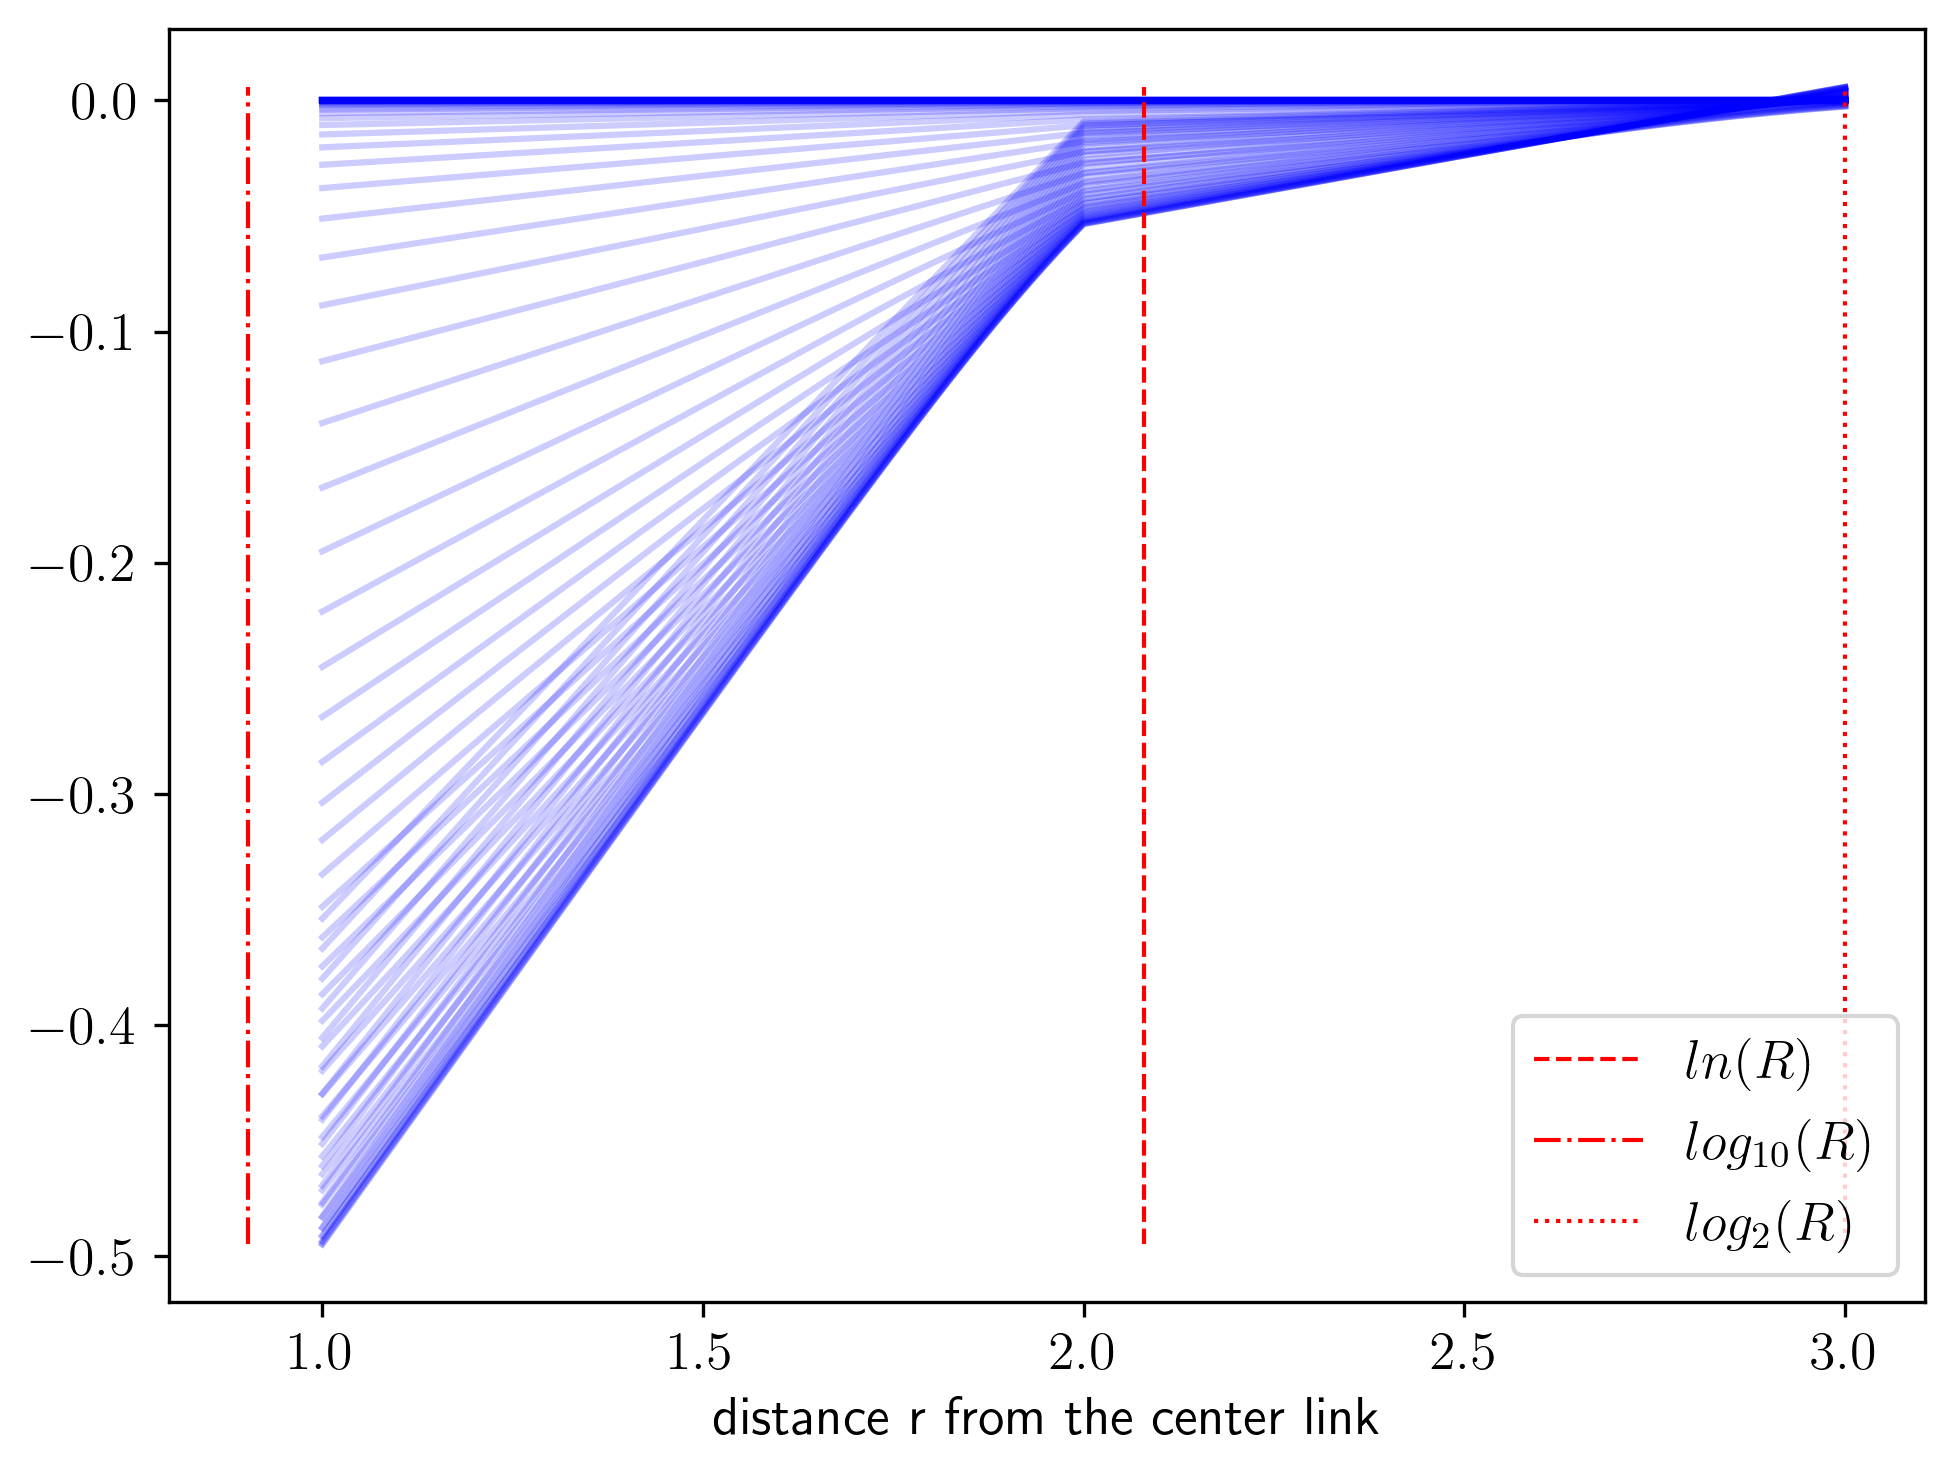

In [25]:
# correlator decay
for half_c in half_corr:
    plt.plot(range(1,l//2+1), half_c[::-1], alpha=0.2, color='blue')
plt.vlines(x=np.log(L_string), ymin=np.min(half_corr), ymax=np.max(half_corr), linestyle='--', linewidth=1, color='r', label='$ln(R)$')
plt.vlines(x=np.log10(L_string), ymin=np.min(half_corr), ymax=np.max(half_corr), linestyle='-.', linewidth=1, color='r', label='$log_{10}(R)$')
plt.vlines(x=np.log2(L_string), ymin=np.min(half_corr), ymax=np.max(half_corr), linestyle=':', linewidth=1, color='r', label='$log_{2}(R)$')
plt.legend()
# plt.yscale('log')
plt.xlabel('distance r from the center link')
plt.show()

In [45]:
np.linspace(0.5,1.5,201)

array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
       0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
       0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
       0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
       0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
       0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
       0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
       0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.845, 0.85 , 0.855,
       0.86 , 0.865, 0.87 , 0.875, 0.88 , 0.885, 0.89 , 0.895, 0.9  ,
       0.905, 0.91 , 0.915, 0.92 , 0.925, 0.93 , 0.935, 0.94 , 0.945,
       0.95 , 0.955, 0.96 , 0.965, 0.97 , 0.975, 0.98 , 0.985, 0.99 ,
       0.995, 1.   , 1.005, 1.01 , 1.015, 1.02 , 1.025, 1.03 , 1.035,
       1.04 , 1.045, 1.05 , 1.055, 1.06 , 1.065, 1.07 , 1.075, 1.08 ,
       1.085, 1.09 , 1.095, 1.1  , 1.105, 1.11 , 1.115, 1.12 , 1.125,
       1.13 , 1.135,